In [4]:
!pip install ffmpeg-python

#!pkg-config --modversion opencv
#!sudo apt-get purge libopencv* python-opencv
!sudo apt-get install build-essential cmake pkg-config
!pip install opencv-python==3.4.18.65

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
build-essential is already the newest version (12.8ubuntu1.1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [5]:
!mkdir frames
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C88SpUPSoI7m9WQ2HIoT3Uv3e6eODgoJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1C88SpUPSoI7m9WQ2HIoT3Uv3e6eODgoJ" -O sample_vid.avi && rm -rf ~/cookies.txt
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C3SGWrYhIV6953cfw7hnrEc21F6oxZCH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1C3SGWrYhIV6953cfw7hnrEc21F6oxZCH" -O sample_vid2.avi && rm -rf ~/cookies.txt

mkdir: cannot create directory ‘frames’: File exists
--2023-07-06 04:59:03--  https://docs.google.com/uc?export=download&confirm=&id=1C88SpUPSoI7m9WQ2HIoT3Uv3e6eODgoJ
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.101, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ef5pogu7qlcthqt40e7hii72jg9s2fi/1688619525000/05108294958722472523/*/1C88SpUPSoI7m9WQ2HIoT3Uv3e6eODgoJ?e=download&uuid=666952ff-1f2f-47d9-9ab8-70e080965982 [following]
--2023-07-06 04:59:04--  https://doc-04-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ef5pogu7qlcthqt40e7hii72jg9s2fi/1688619525000/05108294958722472523/*/1C88SpUPSoI7m9WQ2HIoT3Uv3e6eODgoJ?e=download&uuid=666952ff-1f2f-47d9-9ab8-70e080965982
Resolving doc-04-a8-docs.googleusercontent.com (doc-04-a8

# Tutorial on video analysis

In [6]:
# Import Libraries
from matplotlib import pyplot as plt # To Visualize
import ffmpeg                        # To Handle Video
import numpy as np                   # To Handle Array
import os                            # To Handle OS
import cv2                           # To Handle Image/Video

### Get Video Information

In [7]:
# Load Video
vid = cv2.VideoCapture('sample_vid.avi')
print('Height of the frames : {}'.format(vid.get(3)))
print('Width of the frames : {}'.format(vid.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 25.0
Total frames included in the video : 119.0


In [8]:
print('Height of the frames : {}'.format(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Width of the frames : {}'.format(vid.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(cv2.CAP_PROP_FPS)))
print('Total frames included in the video : {}'.format(vid.get(cv2.CAP_PROP_FRAME_COUNT)))

Height of the frames : 240.0
Width of the frames : 320.0
Frame rates (FPS) of the video : 25.0
Total frames included in the video : 119.0


## Convert Video to the Video with Different Frame Rate (FPS)

In [9]:
# First form
if os.path.exists('downsample_vid.avi'):
    os.remove('downsample_vid.avi')
(
    ffmpeg
    .input('sample_vid.avi')
    .filter('fps', fps=10, round='up')
    .output('downsample_vid.avi')
    .run()
)

(None, None)

## Check the Difference

In [10]:
vid = cv2.VideoCapture('downsample_vid.avi')
print('Height of the frames : {}'.format(vid.get(3)))
print('Width of the frames : {}'.format(vid.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 10.0
Total frames included in the video : 48.0


## Extract frames from the video with scaling

In [11]:
# Second form
ffmpeg.input('sample_vid.avi').filter('fps', fps=5, round='up').filter('scale',200,100).output('frames/frame_%02d.jpg').run()

(None, None)

['frame_02.jpg', 'frame_03.jpg', 'frame_04.jpg', 'frame_05.jpg', 'frame_06.jpg', 'frame_07.jpg']


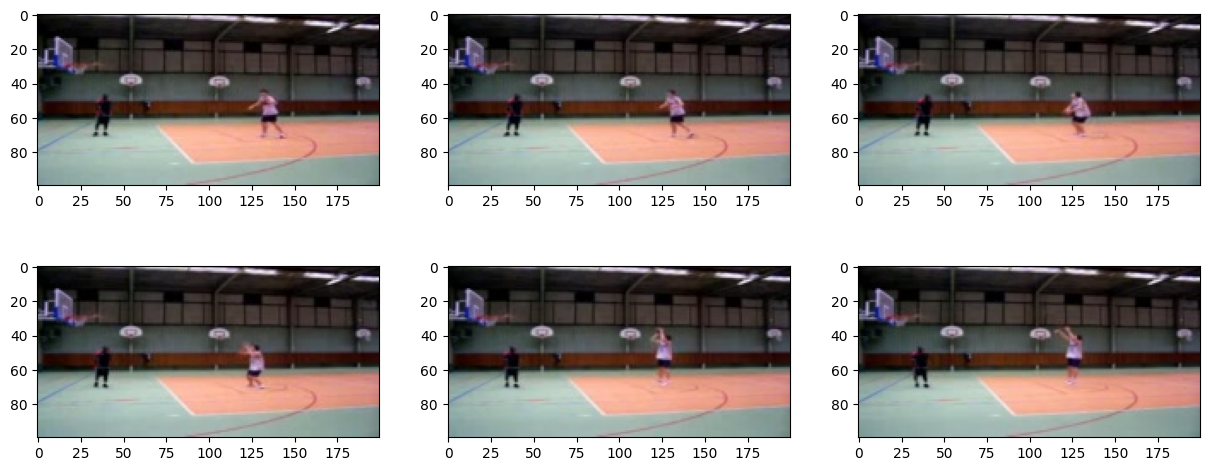

In [12]:
# Visualizing the extrated frames
frames = sorted(os.listdir('frames'))[1:7]
print(frames)
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
axs = axs.ravel()

for i in range(len(frames)):
    img_path = os.path.join('frames',frames[i])
    img = cv2.imread(img_path)
    axs[i].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))

# Optical Flow

In [13]:
def ToImg(raw_flow,bound):
    '''
    this function scale the input pixels to 0-255 with bi-bound
    raw_flow: input raw pixel value (not in 0-255)
    bound: upper and lower bound (-bound, bound)
    :return: pixel value scale from 0 to 255
    '''
    flow=raw_flow
    flow[flow>bound]=bound
    flow[flow<-bound]=-bound
    flow-=-bound
    flow*=(255/float(2*bound))
    return flow

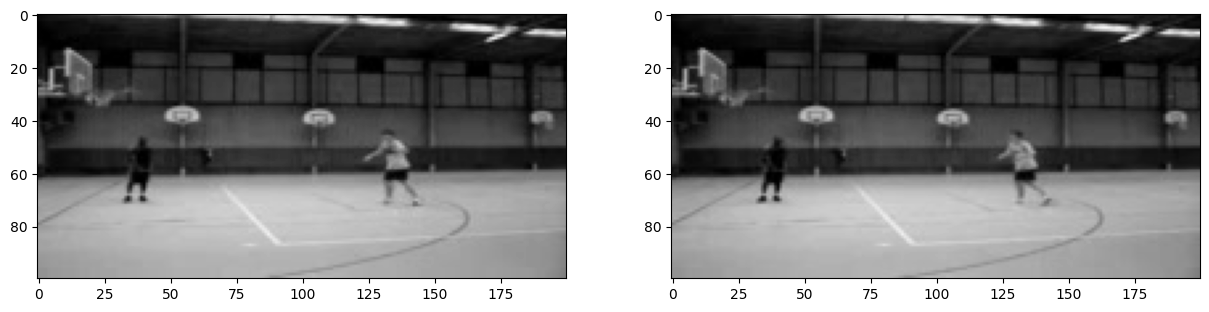

In [14]:
# Extract the TVL1 optical flow from the first 2 frames
frame_0 = os.path.join('frames', frames[0])
frame_0 = cv2.imread(frame_0,0)
frame_1 = os.path.join('frames', frames[1])
frame_1 = cv2.imread(frame_1,0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(frame_0, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(frame_1, cmap='gray', vmin=0, vmax=255)

In [15]:
bound = 5
dtvl1=cv2.createOptFlow_DualTVL1()
flowDTVL1=dtvl1.calc(frame_0,frame_1,None)

flow_x=ToImg(flowDTVL1[...,0],bound) # Motion difference along the X axis
flow_y=ToImg(flowDTVL1[...,1],bound) # Motion difference along the Y axis


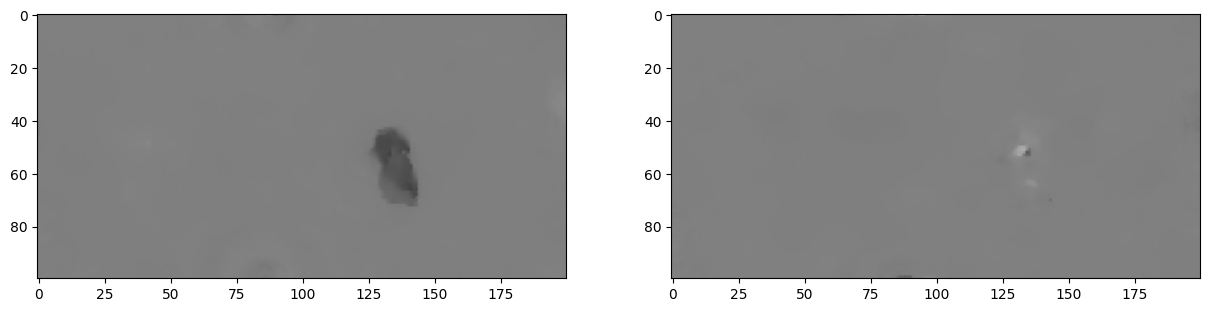

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(flow_x, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(flow_y, cmap='gray', vmin=0, vmax=255)

# EXERCISE 1 :
Use sample_vid2.avi, extract "flipped & center cropped" frames with 5fps, and extract optical flow frames

In [18]:
vid2 = cv2.VideoCapture('sample_vid2.avi')
print('Height of the frames : {}'.format(vid2.get(3)))
print('Width of the frames : {}'.format(vid2.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid2.get(5)))
print('Total frames included in the video : {}'.format(vid2.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 29.97002997002997
Total frames included in the video : 201.0


In [ ]:
'''
TO DO:
Following the example above, extract optical flow frames
1) 5fps
2) Horizontally flipped : hflip()
3) center cropped (100,100) : crop(x,y,width,height)
'''

In [19]:
'''
1) Run FFmpeg here
'''
# (320-100) / 2 - (320 - 100) / 2 + 100
ffmpeg.input('sample_vid2.avi').filter('fps', fps=5, round='up').hflip().crop(110, 70, 100, 100).output('frames/frame_%02d.jpg').run()
ffmpeg.input('sample_vid2.avi').filter('fps', fps=5, round='up').output('frames/frame_o_%02d.jpg').run()


(None, None)

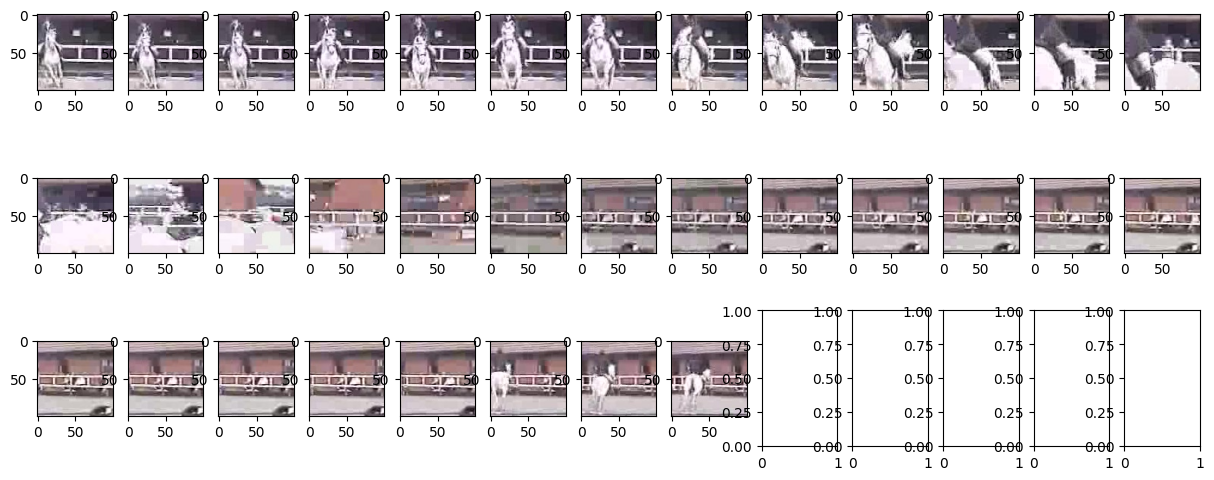

In [32]:
# Visualizing the extrated frames
# import re
# frames = [f for f in os.listdir('frames') if re.match(r'frame_[0-9]+.*\.jpg', f)]
# print(frames)
# number 1-34
frames = []
for i in range(1, 35):
  frames.append('frames/frame_%02d.jpg'%i)
# print(frames)

fig, axs = plt.subplots(3, 13, figsize=(15, 6))
axs = axs.ravel()

for i in range(len(frames)):
    img_path = frames[i]
    img = cv2.imread(img_path)
    axs[i].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))

# frame_o = cv2.imread('frames/frame_02.jpg')
# plt.imshow(cv2.cvtColor(frame_o, cv2.COLOR_BGR2RGB))

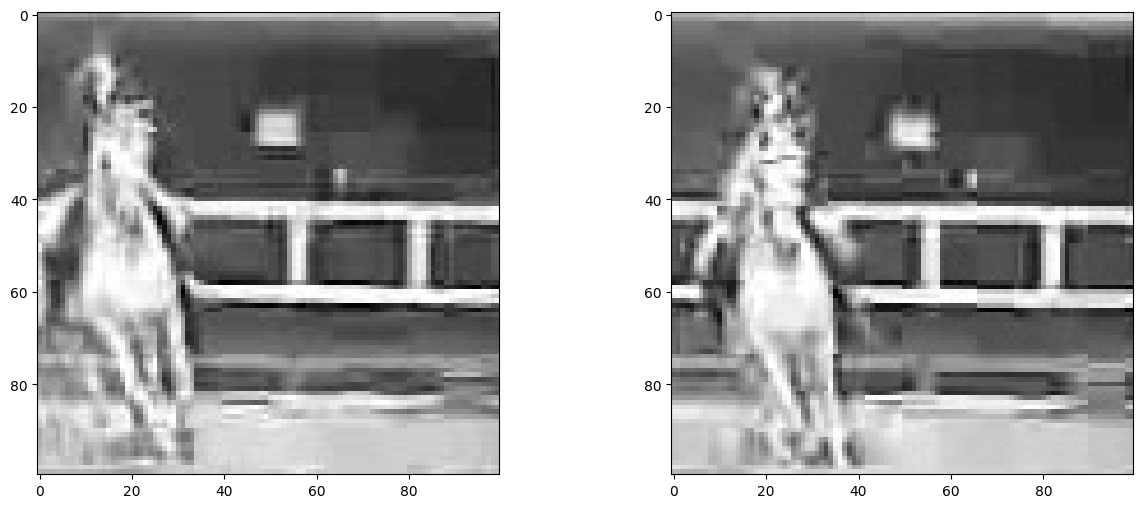

In [33]:
'''
2) Extract Optical Flow Frames
'''
# Extract the TVL1 optical flow from the first 2 frames
frame_0 = frames[0]
frame_0 = cv2.imread(frame_0,0)
frame_1 = frames[1]
frame_1 = cv2.imread(frame_1,0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(frame_0, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(frame_1, cmap='gray', vmin=0, vmax=255)

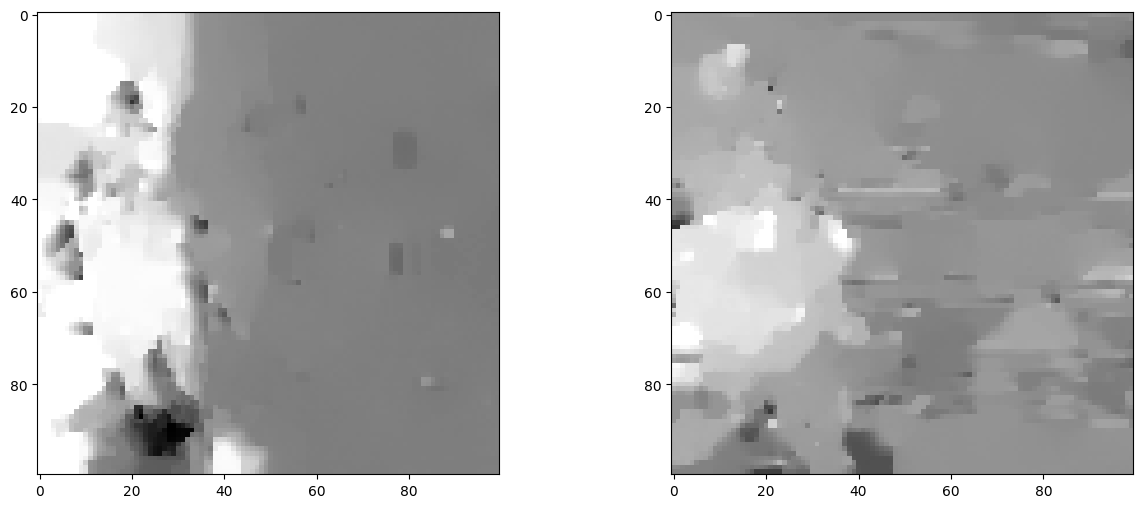

In [34]:
bound = 5
dtvl1=cv2.createOptFlow_DualTVL1()
flowDTVL1=dtvl1.calc(frame_0,frame_1,None)

flow_x=ToImg(flowDTVL1[...,0],bound) # Motion difference along the X axis
flow_y=ToImg(flowDTVL1[...,1],bound) # Motion difference along the Y axisfig, axs = plt.subplots(1, 2, figsize=(15, 6))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(flow_x, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(flow_y, cmap='gray', vmin=0, vmax=255)